In [6]:
from util import *
from cost import *

ModuleNotFoundError: No module named 'cv2'

Image name (shape) (intensity max, min, mean, std)

original (240, 720) (210, 0, 49.3, 34.8)


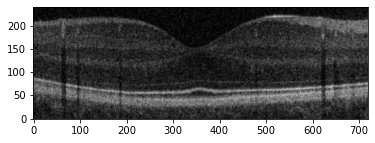

In [2]:
# Global variables

IMAGE_DIR = 'images'
IMAGE_NAME='original'
MASK = [320, 560, 160, 880] # ymin ymax xmin xmax
image = prep_image(IMAGE_DIR, IMAGE_NAME, MASK)

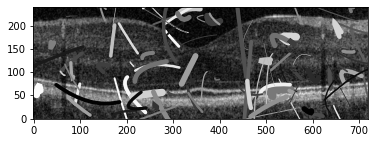

In [3]:
# Calling the cost should return the output directly from a clew of worms.
clew = initialise_clew(100, image.shape, (40, 30, 1))
worm_1 = clew[-1]
drawing = Drawing(image)
drawing.add_worms(clew)
drawing.show()

In [4]:
# Usage for calculating total cost for clew
cost_num = CostFunction.get_particle_cost(clew, image)
print(cost_num)

NameError: name 'CostFunction' is not defined

In [2]:
# Function compares the colour of the worm's region in the area vs the worm's colour and returns absolute difference
def camo_difference(clew, image):
    total_cost = 0
    for worm in clew:
        worm_length = round(worm.approx_length())
        _wl = worm_length
        # print(worm_length)
        region_colour_total = 0
        for discrete_unit in range(worm_length):
            colour_at_point = worm.colour_at_t(discrete_unit / worm_length, image)
            if colour_at_point == -1:
                _wl -= 1
            else:
                region_colour_total += colour_at_point
        total_cost += abs(region_colour_total - (_wl * worm.colour))
    return total_cost


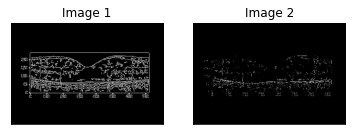

Score for iter 1: 439365
Score for Iter 24: 2056320


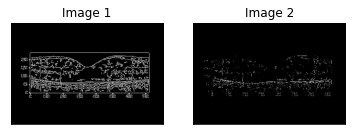

Score for iter 1: 439365
Score for Iter 24: 469200


In [1]:
from evaluation import *

# Run evaluation of two images

IMG1_PATH = './images/blank_drawing.png'
IMG2_PATH = './gbest_imgs/gbest_1.png'

print("Score for iter 1: " + str(evaluate_images(IMG1_PATH, IMG2_PATH, False)))

IMG1_PATH = './images/blank_drawing.png'
IMG2_PATH = './gbest_imgs/gbest_24.png'

print("Score for Iter 24: " + str(evaluate_images(IMG1_PATH, IMG2_PATH, False)))